        spend  Administration  marketing       State     Profit
0   165349.20       136897.80  471784.10    New York  192261.83
1   162597.70       151377.59  443898.53  California  191792.06
2   153441.51       101145.55  407934.54     Florida  191050.39
3   144372.41       118671.85  383199.62    New York  182901.99
4   142107.34        91391.77  366168.42     Florida  166187.94
5   131876.90        99814.71  362861.36    New York  156991.12
6   134615.46       147198.87  127716.82  California  156122.51
7   130298.13       145530.06  323876.68     Florida  155752.60
8   120542.52       148718.95  311613.29    New York  152211.77
9   123334.88       108679.17  304981.62  California  149759.96
10  101913.08       110594.11  229160.95     Florida  146121.95
11  100671.96        91790.61  249744.55  California  144259.40
12   93863.75       127320.38  249839.44     Florida  141585.52
13   91992.39       135495.07  252664.93  California  134307.35
14  119943.24       156547.42  256512.92

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


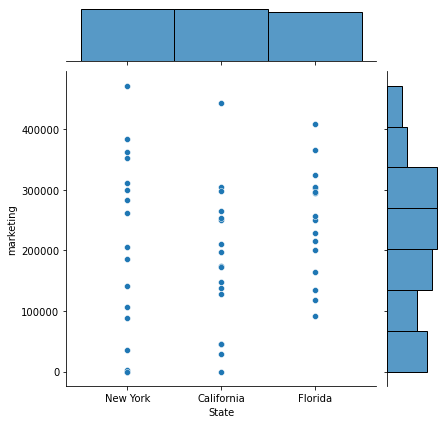

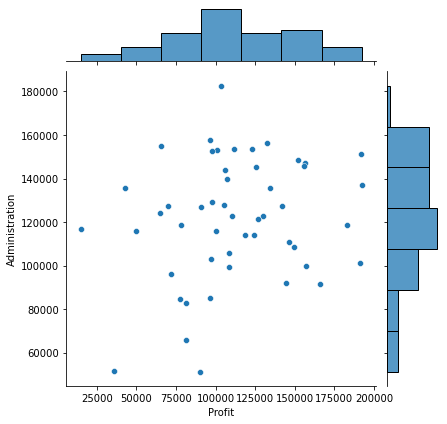

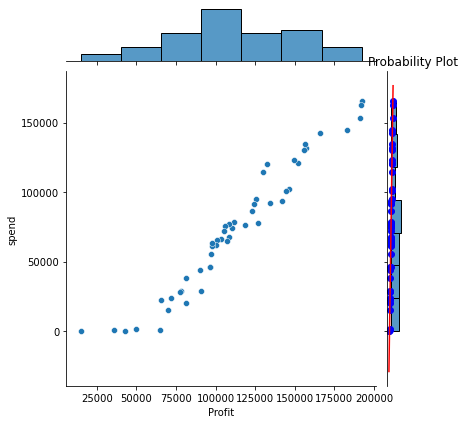

C:\Users\tarun\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


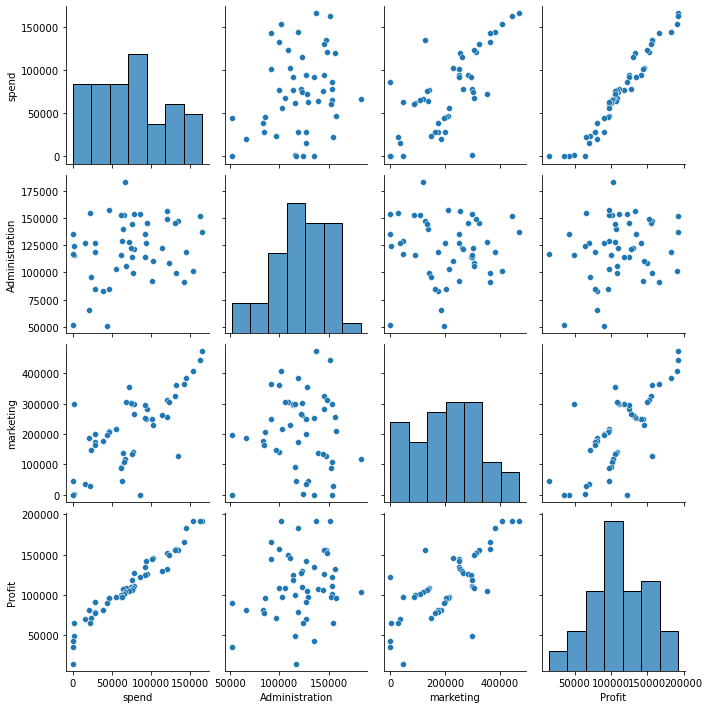

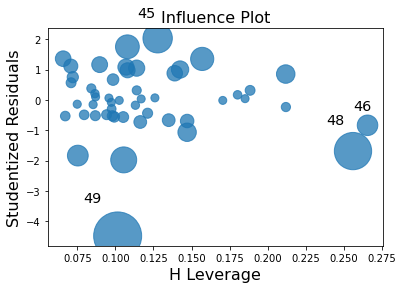

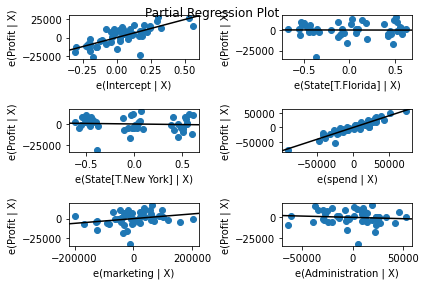

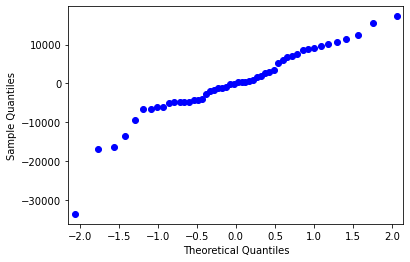

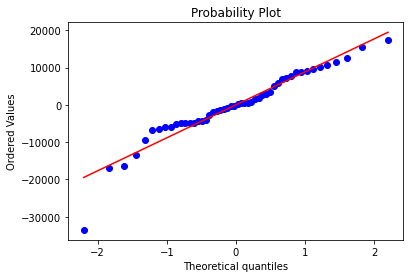

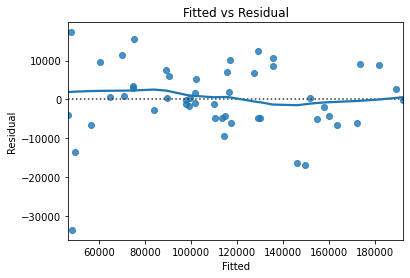

8778.218649284232

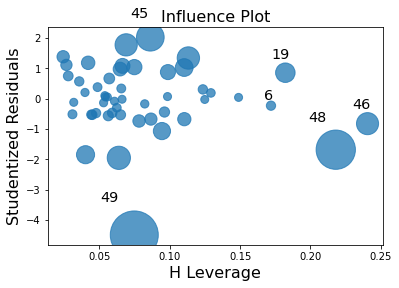

In [1]:
#Multiple Linear Regression (Module -7)
#Problem Statement: -	
#An Analytics Company has been tasked by a crucial job of  finding out what factors does affect a startup company and will it be profitable to do so or not. For this they have collected some historical data and would like to apply supervised predictive learning algorithm such as Multilinear regression on it and provide brief insights about their data. Predict Profit, given different attributes for various startup companies.
#Answer;-
import pandas as pd
import numpy as np
import seaborn as sns
company = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Multilinear Regression\50_Startups.csv")
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

company.describe()
company.columns
company.rename(columns={"R&D Spend" : "spend" , "Marketing Spend" : "marketing"},inplace=True)
company.columns
company.isna().sum() # there are no NA value in the dataset
print(company) 
company.dtypes

#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 
import seaborn as sns
sns.jointplot(x=company['Profit'], y=company['spend'])
sns.jointplot(x=company['State'], y=company['marketing'])
sns.jointplot(x=company['Profit'],y=company['Administration'])

# Countplot
plt.figure(1, figsize=(16, 10))
sns.countplot(company['Profit'])

# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(company.spend, dist = "norm", plot = pylab)
plt.show()
# Scatter plot between the variables along with histograms
sns.pairplot(company.iloc[:, :])
                             
# Correlation matrix 
company.corr()

# we see there exists High collinearity between input variables especially between
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
ml1 = smf.ols('Profit ~ spend + State + marketing + Administration', data = company).fit() # regression model
# Summary
ml1.summary()
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row

company_new = company.drop(company.index[[45]])
# Preparing model                  
ml_new = smf.ols('Profit ~ spend + State + marketing + Administration', data = company_new).fit()    
# Summary
ml_new.summary()
sm.graphics.plot_partregress_grid(ml_new)
# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_hp = smf.ols('Profit ~ spend + marketing + Administration', data = company).fit().rsquared  
vif_hp = 1/(1 - rsq_hp) 

rsq_wt = smf.ols('spend ~Profit + marketing + Administration', data = company).fit().rsquared  
vif_wt = 1/(1 - rsq_wt)

rsq_vol = smf.ols('marketing ~ Administration + spend + Profit', data = company).fit().rsquared  
vif_vol = 1/(1 - rsq_vol) 

rsq_sp = smf.ols('Profit ~ Administration + spend + marketing', data = company).fit().rsquared  
vif_sp = 1/(1 - rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['spend', 'Profit', 'Administration', 'marketing'], 'VIF':[vif_hp, vif_wt, vif_vol, vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
# As WT is having highest VIF value, we are going to drop this from the prediction model

# Final model
final_ml = smf.ols('Profit ~ spend + marketing + Administration', data = company).fit()
final_ml.summary() 
# Prediction
pred = final_ml.predict(company)

# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

# Residuals vs Fitted plot
sns.residplot(x = pred, y = company.Profit, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

sm.graphics.influence_plot(final_ml)
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
company_train, company_test = train_test_split(company, test_size = 0.2) # 20% test data

# preparing the model on train data 
model_train = smf.ols("Profit ~ spend + marketing + Administration", data = company_train).fit()

# prediction on test data set 
test_pred = model_train.predict(company_test)

# test residual values 
test_resid = test_pred - company_test.Profit
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse


# train_data prediction
train_pred = model_train.predict(company_train)

# train residual values 
train_resid  = train_pred - company_train.Profit
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

         x  price  speed    hd  ram  screen   cd multi premium  ads  trend
0        1   1499     25    80    4      14   no    no     yes   94      1
1        2   1795     33    85    2      14   no    no     yes   94      1
2        3   1595     25   170    4      15   no    no     yes   94      1
3        4   1849     25   170    8      14   no    no      no   94      1
4        5   3295     33   340   16      14   no    no     yes   94      1
...    ...    ...    ...   ...  ...     ...  ...   ...     ...  ...    ...
6254  6255   1690    100   528    8      15   no    no     yes   39     35
6255  6256   2223     66   850   16      15  yes   yes     yes   39     35
6256  6257   2654    100  1200   24      15  yes    no     yes   39     35
6257  6258   2195    100   850   16      15  yes    no     yes   39     35
6258  6259   2490    100   850   16      17  yes    no     yes   39     35

[6259 rows x 11 columns]


C:\Users\tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


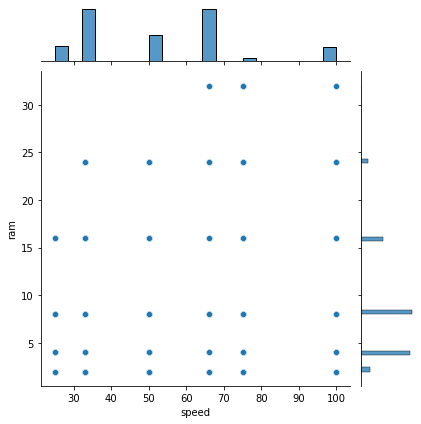

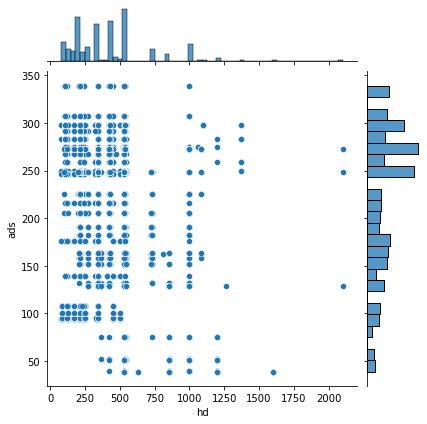

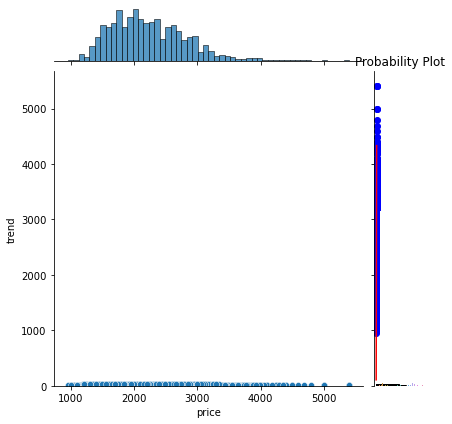

ValueError: All arrays must be of the same length

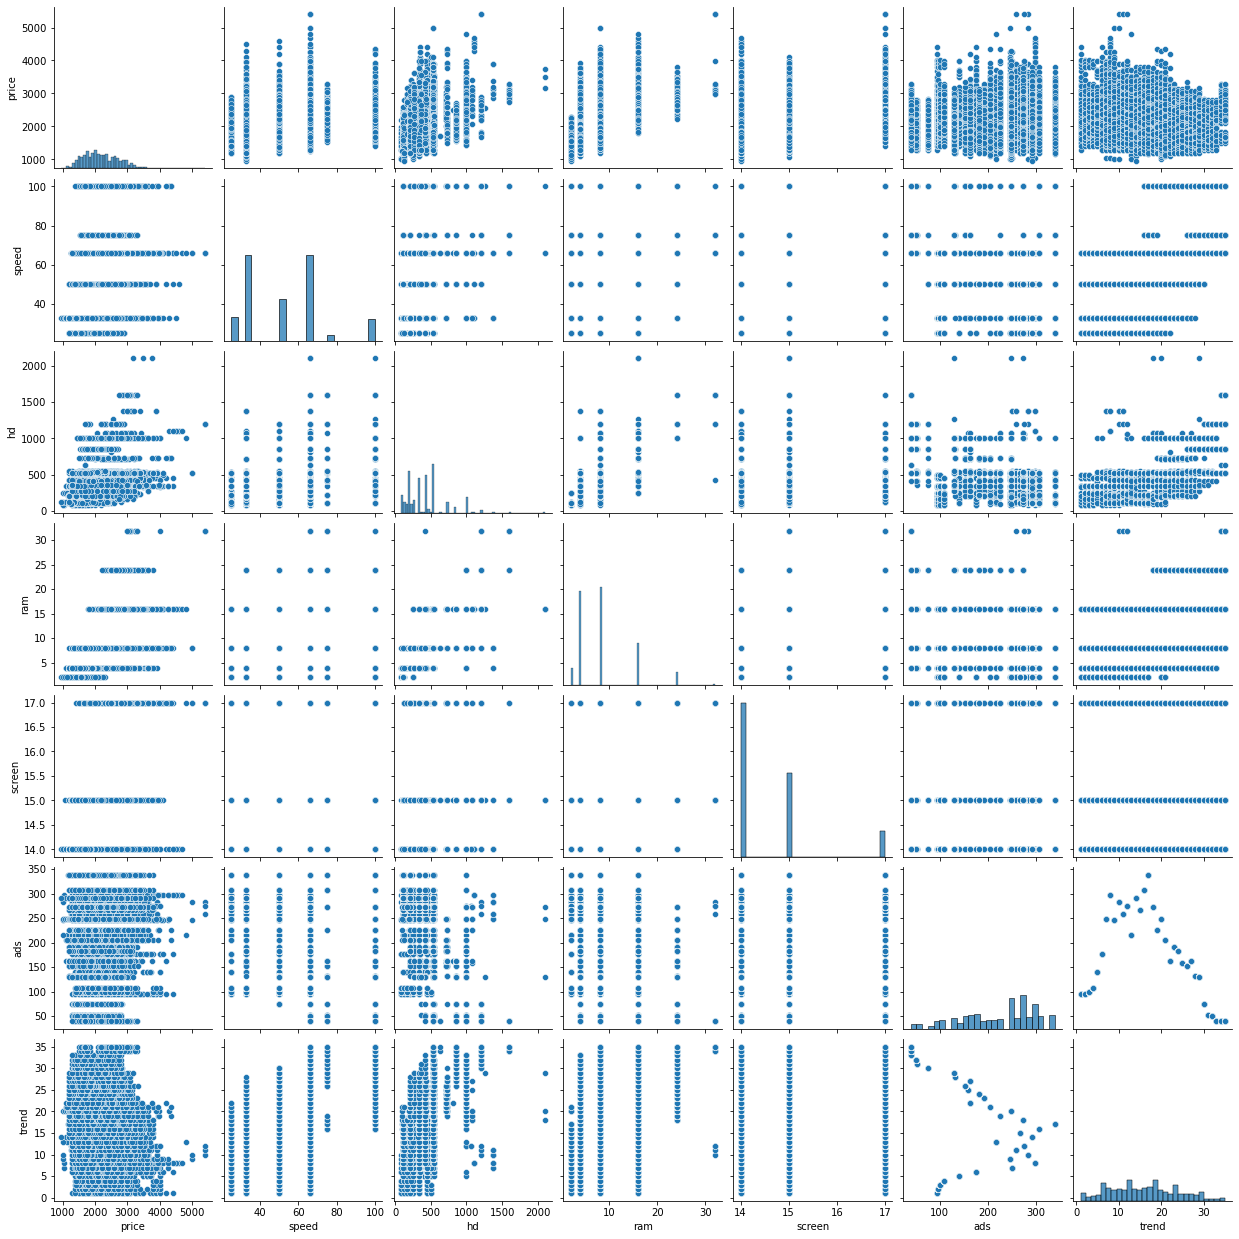

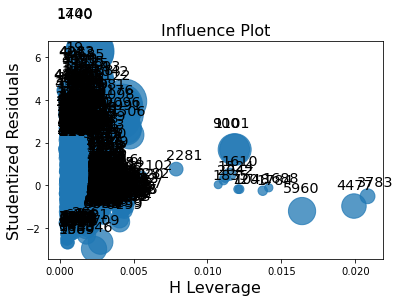

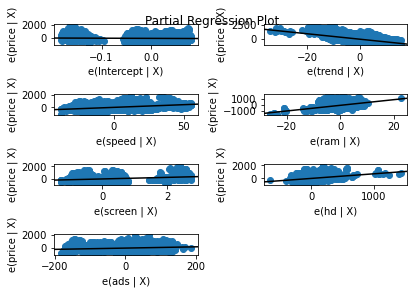

In [4]:
#Problem Statement: -
#Officeworks, is a leading retail store in Australia, with numerous outlets around the country. The manager would like to improve their customer experience by providing them online predictive prices about their gadgets/ Laptops if they wants to sell them. To improve this experience the manager would like us to build a model which is sustainable and accurate enough, to get the objective achieved. Apply multilinear model on the dataset and predict Price, given other attributes and tabulate R squared ,RMSE and correlation values.
#Answer;-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
computer = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Multilinear Regression\Computer_Data.csv")
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

computer.describe()
computer.columns
computer.rename(columns={"Unnamed: 0" : "x"},inplace=True)
computer.columns
computer.isna().sum() # there are no NA value in the dataset
print(computer) 
computer.dtypes
#removing unwanted column from the dataset
computer.drop('cd', axis=1, inplace=True)
computer.drop('multi', axis=1, inplace=True)
computer.drop('premium', axis=1, inplace=True)
computer.drop('x', axis=1, inplace=True)
computer.columns
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 
import seaborn as sns
sns.jointplot(x=computer['price'], y=computer['trend'])
sns.jointplot(x=computer['speed'], y=computer['ram'])
sns.jointplot(x=computer['hd'],y=computer['ads'])

# Countplot
plt.figure(1, figsize=(16, 10))
sns.countplot(computer['price'])

# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(computer.price, dist = "norm", plot = pylab)
plt.show()
# Scatter plot between the variables along with histograms
sns.pairplot(computer.iloc[:, :])
                             
# Correlation matrix 
computer.corr()

# we see there exists High collinearity between input variables especially between
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
ml1 = smf.ols('price ~ trend + speed + ram + screen + hd + ads ', data = computer).fit() # regression model
# Summary
ml1.summary()
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row

computer_new = computer.drop(computer.index[[6209]])
# Preparing model                  
ml_new = smf.ols('price ~ trend + speed + ram + screen + hd + ads', data = computer_new).fit()    
# Summary
ml_new.summary()
sm.graphics.plot_partregress_grid(ml_new)
# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_hp = smf.ols('trend ~ speed + screen + ram', data = computer).fit().rsquared  
vif_hp = 1/(1 - rsq_hp) 

rsq_wt = smf.ols('speed ~trend + hd + ads', data = computer).fit().rsquared  
vif_wt = 1/(1 - rsq_wt)

rsq_vol = smf.ols('hd ~ ads + speed + trend', data = computer).fit().rsquared  
vif_vol = 1/(1 - rsq_vol) 

rsq_sp = smf.ols('ads ~ hd + screen + ram', data = computer).fit().rsquared  
vif_sp = 1/(1 - rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['trend ~ speed + screen + ram'], 'VIF':[vif_hp, vif_wt, vif_vol, vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
# As WT is having highest VIF value, we are going to drop this from the prediction model

# Final model
final_ml = smf.ols('trend ~ speed + screen + ram', data = computer).fit()
final_ml.summary() 
# Prediction
pred = final_ml.predict(computer)

# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

# Residuals vs Fitted plot
sns.residplot(x = pred, y = computer.price, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

sm.graphics.influence_plot(final_ml)
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
computer_train, computer_test = train_test_split(computer, test_size = 0.2) # 20% test data

# preparing the model on train data 
model_train = smf.ols("trend ~ speed + screen + ram", data = computer_train).fit()

# prediction on test data set 
test_pred = model_train.predict(computer_test)

# test residual values 
test_resid = test_pred - computer_test.price
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse


# train_data prediction
train_pred = model_train.predict(computer_train)

# train residual values 
train_resid  = train_pred - computer_train.price
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

In [6]:
#Problem Statement: -
#An online car sales platform would like to improve its customer base and their experience by providing them an easy way  to buy and sell cars. For this, they would like an automated model which can predict the price of the car if user inputs the required factors. Help the business achieve the objective by applying multilinear regression on the given dataset. 
#Please use the below columns for the analysis purpose.
#Price,Age_08_04, KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
#Answer;-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
toyota = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Multilinear Regression\ToyotaCorolla.csv")
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

toyota.describe()
toyota.columns
toyota.isna().sum() # there are no NA value in the dataset
print(toyota) 
toyota.dtypes
#removing unwanted column from the dataset
toyota.drop('Id', axis=1, inplace=True)
toyota.drop('Model', axis=1, inplace=True)
toyota.drop('Mfg_Month', axis=1, inplace=True)
toyota.drop('Mfg_Year', axis=1, inplace=True)
toyota.drop('Fuel_Type', axis=1, inplace=True)
toyota.drop('Met_Color', axis=1, inplace=True)
toyota.drop('Color', axis=1, inplace=True)
toyota.drop('Automatic', axis=1, inplace=True)
toyota.drop('Cylinders', axis=1, inplace=True)
toyota.drop('Mfr_Guarantee', axis=1, inplace=True)
toyota.drop('BOVAG_Guarantee', axis=1, inplace=True)
toyota.drop('Guarantee_Period', axis=1, inplace=True)
toyota.drop('ABS', axis=1, inplace=True)
toyota.drop('Airbag_1', axis=1, inplace=True)
toyota.drop('Airbag_2', axis=1, inplace=True)
toyota.drop('Airco', axis=1, inplace=True)
toyota.drop('Automatic_airco', axis=1, inplace=True)
toyota.drop('Boardcomputer', axis=1, inplace=True)
toyota.drop('CD_Player', axis=1, inplace=True)
toyota.drop('Central_Lock', axis=1, inplace=True)
toyota.drop('Powered_Windows', axis=1, inplace=True)
toyota.drop('Power_Steering', axis=1, inplace=True)
toyota.drop('Radio', axis=1, inplace=True)
toyota.drop('Mistlamps', axis=1, inplace=True)
toyota.drop('Sport_Model', axis=1, inplace=True)
toyota.drop('Backseat_Divider', axis=1, inplace=True)
toyota.drop('Metallic_Rim', axis=1, inplace=True)
toyota.drop('Radio_cassette', axis=1, inplace=True)
toyota.drop('Tow_Bar', axis=1, inplace=True)
toyota.columns
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 
import seaborn as sns
sns.jointplot(x=toyota['Price'], y=toyota['Age_08_04'])
sns.jointplot(x=toyota['KM'], y=toyota['Weight'])
sns.jointplot(x=toyota['HP'],y=toyota['Quarterly_Tax'])

# Countplot
plt.figure(1, figsize=(16, 10))
sns.countplot(toyota['Price'])

# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(toyota.Price, dist = "norm", plot = pylab)
plt.show()
# Scatter plot between the variables along with histograms
sns.pairplot(toyota.iloc[:, :])
                             
# Correlation matrix 
toyota.corr()

# we see there exists High collinearity between input variables especially between
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
ml1 = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears+ Quarterly_Tax+ Weight', data = toyota).fit() # regression model
# Summary
ml1.summary()
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row

toyota_new = computer.drop(toyota.index[[1431]])
toyota_new.columns
# Preparing model                  
ml_new = smf.ols('price ~ speed + hd + ram + screen + ads+ trend', data = toyota_new).fit()    
# Summary
ml_new.summary()
sm.graphics.plot_partregress_grid(ml_new)
# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_hp = smf.ols('Weight ~ Age_08_04 + KM + HP', data = toyota).fit().rsquared  
vif_hp = 1/(1 - rsq_hp) 

rsq_wt = smf.ols('cc ~ Doors + Gears + Quarterly_Tax', data = toyota).fit().rsquared  
vif_wt = 1/(1 - rsq_wt)

rsq_vol = smf.ols('Weight ~ KM + Gears + Doors', data = toyota).fit().rsquared  
vif_vol = 1/(1 - rsq_vol) 

rsq_sp = smf.ols('Age_08_04 ~ cc + Quarterly_Tax + KM', data = toyota).fit().rsquared  
vif_sp = 1/(1 - rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Weight ~ Age_08_04 + KM + HP'], 'VIF':[vif_hp, vif_wt, vif_vol, vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
# As WT is having highest VIF value, we are going to drop this from the prediction model

# Final model
final_ml = smf.ols('Weight ~ Age_08_04 + KM + HP', data = toyota).fit()
final_ml.summary() 
# Prediction
pred = final_ml.predict(toyota)

# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

# Residuals vs Fitted plot
sns.residplot(x = pred, y = toyota.price, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

sm.graphics.influence_plot(final_ml)
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
toyota_train, toyota_test = train_test_split(toyota, test_size = 0.2) # 20% test data

# preparing the model on train data 
model_train = smf.ols("Weight ~ Age_08_04 + KM + HP", data = toyota_train).fit()

# prediction on test data set 
test_pred = model_train.predict(toyota_test)

# test residual values 
test_resid = test_pred - toyota_test.price
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse


# train_data prediction
train_pred = model_train.predict(toyota_train)

# train residual values 
train_resid  = train_pred - toyota_train.price
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 679: invalid start byte

       price     volume  tot_ava1   tot_ava2  tot_ava3  Total_Bags  \
0       1.33   64236.62   1036.74   54454.85     48.16     8696.87   
1       1.35   54876.98    674.28   44638.81     58.33     9505.56   
2       0.93  118220.22    794.70  109149.67    130.50     8145.35   
3       1.08   78992.15   1132.00   71976.41     72.58     5811.16   
4       1.28   51039.60    941.48   43838.39     75.78     6183.95   
...      ...        ...       ...        ...       ...         ...   
18244   1.63   17074.83   2046.96    1529.20      0.00    13498.67   
18245   1.71   13888.04   1191.70    3431.50      0.00     9264.84   
18246   1.87   13766.76   1191.92    2452.79    727.94     9394.11   
18247   1.93   16205.22   1527.63    2981.04    727.01    10969.54   
18248   1.62   17489.58   2894.77    2356.13    224.53    12014.15   

       Small_Bags  Large_Bags   xl          type  year            region  
0         8603.62       93.25  0.0  conventional  2015            Albany  
1        

C:\Users\tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


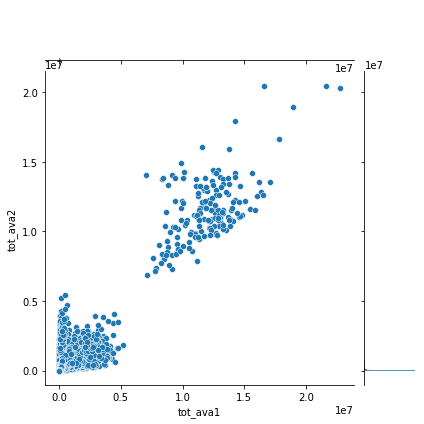

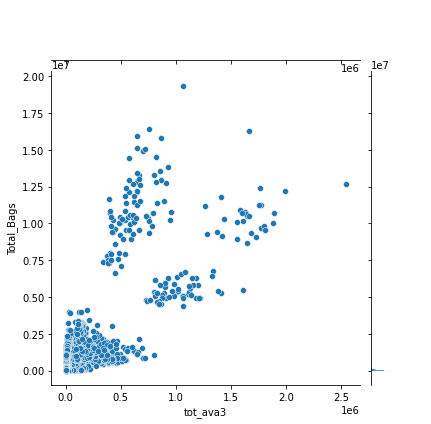

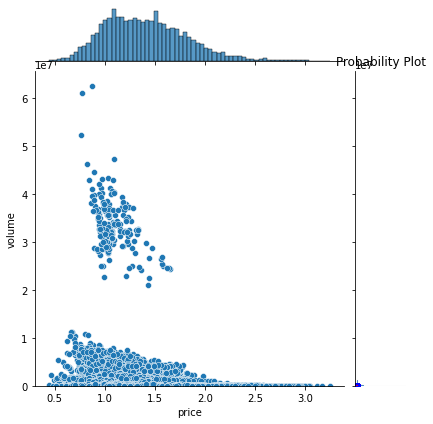

ValueError: endog has evaluated to an array with multiple columns that has shape (18249, 10). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
#Problem Statement: -
#With the growing consumption of Avacado, in USA, a freelance company would like to do some analysis on the patterns of consumption in different cities and also would like to come up with a prediction model of price for Avocado. For this to be implemented build a prediction model using multilinear regression and provide your insights on it.
#Answer;-
import pandas as pd
import numpy as np
import seaborn as sns
avacado = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Multilinear Regression\Avacado_Price.csv")
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

avacado.describe()
avacado.columns
avacado.rename(columns={"AveragePrice" : "price" , "Total_Volume" : "volume","XLarge Bags": "xl"},inplace=True)
avacado.columns
avacado.isna().sum() # there are no NA value in the dataset
print(avacado) 
avacado.dtypes
#removing unwanted column from the dataset
avacado.drop('type', axis=1, inplace=True)
avacado.drop('region', axis=1,inplace=True)
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 
import seaborn as sns
sns.jointplot(x=avacado['price'], y=avacado['volume'])
sns.jointplot(x=avacado['tot_ava1'], y=avacado['tot_ava2'])
sns.jointplot(x=avacado['tot_ava3'],y=avacado['Total_Bags'])

# Countplot
plt.figure(1, figsize=(16, 10))
sns.countplot(avacado['price'])

# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(avacado.price, dist = "norm", plot = pylab)
plt.show()
# Scatter plot between the variables along with histograms
sns.pairplot(avacado.iloc[:, :])
                             
# Correlation matrix 
avacado.corr()

# we see there exists High collinearity between input variables especially between
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
ml1 = smf.ols('avacado ~ volume + tot_ava1 + tot_ava2 + tot_ava3 + Total_Bags + Small_Bags + Large_Bags + xl + year', data = avacado).fit() # regression model
# Summary
ml1.summary()
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row

avacado_new = avacado.drop(avacado.index[[18244]])
# Preparing model                  
ml_new = smf.ols('price ~ year + tot_ava1 + volume + xl', data = avacado_new).fit()    
# Summary
ml_new.summary()
sm.graphics.plot_partregress_grid(ml_new)
# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_hp = smf.ols('price ~ year + tot_ava1 + volume', data = avacado).fit().rsquared  
vif_hp = 1/(1 - rsq_hp) 

rsq_wt = smf.ols('tot_ava2 ~tot_ava3 + Total_Bags + Small_Bags', data = avacado).fit().rsquared  
vif_wt = 1/(1 - rsq_wt)

rsq_vol = smf.ols('Large_Bags ~ xl + volume + tot_ava2', data = avacado).fit().rsquared  
vif_vol = 1/(1 - rsq_vol) 

rsq_sp = smf.ols('year ~ tot_ava1 + Small_Bags + price', data = avacado).fit().rsquared  
vif_sp = 1/(1 - rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['price ~ year + tot_ava1 + volume'], 'VIF':[vif_hp, vif_wt, vif_vol, vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
# As WT is having highest VIF value, we are going to drop this from the prediction model

# Final model
final_ml = smf.ols('price ~ year + tot_ava1 + volume', data = avacado).fit()
final_ml.summary() 
# Prediction
pred = final_ml.predict(avacado)

# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

# Residuals vs Fitted plot
sns.residplot(x = pred, y = avacado.price, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

sm.graphics.influence_plot(final_ml)
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
avacado_train, avacado_test = train_test_split(avacado, test_size = 0.2) # 20% test data

# preparing the model on train data 
model_train = smf.ols("price ~ year + tot_ava1 + volume", data = avacado_train).fit()

# prediction on test data set 
test_pred = model_train.predict(avacado_test)

# test residual values 
test_resid = test_pred - avacado_test.price
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse


# train_data prediction
train_pred = model_train.predict(avacado_train)

# train residual values 
train_resid  = train_pred - avacado_train.price
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse